In [55]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline 

In [56]:
data = pd.read_csv('data/weather_data_hochiminh_2020.csv', parse_dates=['time'], index_col='time')
data.drop(columns=['prcp','snow','wpgt','tsun'], inplace=   True)

print('Shape of data:', data.shape)

data.head(10)

Shape of data: (366, 6)


,tavg,tmin,tmax,wdir,wspd,pres
time,,,,,,
2020-01-01,28.6,22,35.0,47,10.4,1014.0
2020-01-02,28.9,23,35.0,70,9.8,1014.2
2020-01-03,28.6,24,34.0,38,7.2,1013.1
2020-01-04,27.4,24,33.0,43,6.6,1011.4
2020-01-05,27.3,23,33.0,12,6.7,1011.5
2020-01-06,28.6,23,34.0,54,7.1,1011.6
2020-01-07,29.4,24,35.0,98,7.9,1010.6
2020-01-08,28.6,25,35.0,85,8.4,1010.3
2020-01-09,28.7,24,35.0,104,8.6,1009.2


In [57]:
data.columns

Index(['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres'], dtype='object')

In [58]:
data.describe()

,tavg,tmin,tmax,wdir,wspd,pres
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,28.560109,25.131148,33.332514,179.770492,9.429781,1008.736885
std,1.412486,1.585642,1.936260,92.925552,3.130848,2.093782
min,25.000000,21.000000,27.000000,4.000000,4.100000,1003.200000
25%,27.600000,24.000000,32.000000,112.250000,7.000000,1007.300000
50%,28.400000,25.000000,33.000000,183.000000,8.800000,1008.800000
75%,29.500000,26.000000,35.000000,254.000000,11.600000,1010.000000
max,32.000000,30.000000,38.000000,358.000000,21.500000,1014.600000


In [59]:
data.isnull().any()

tavg    False
tmin    False
tmax    False
wdir    False
wspd    False
pres    False
dtype: bool

In [60]:
weather_data=data.loc[:,['tmax','tmin','tavg','wdir','wspd', 'pres']]
weather_data.head()

,tmax,tmin,tavg,wdir,wspd,pres
time,,,,,,
2020-01-01,35.0,22,28.6,47,10.4,1014.0
2020-01-02,35.0,23,28.9,70,9.8,1014.2
2020-01-03,34.0,24,28.6,38,7.2,1013.1
2020-01-04,33.0,24,27.4,43,6.6,1011.4
2020-01-05,33.0,23,27.3,12,6.7,1011.5


In [61]:
weather_data.shape

(366, 6)

In [62]:
weather_data.columns

Index(['tmax', 'tmin', 'tavg', 'wdir', 'wspd', 'pres'], dtype='object')

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

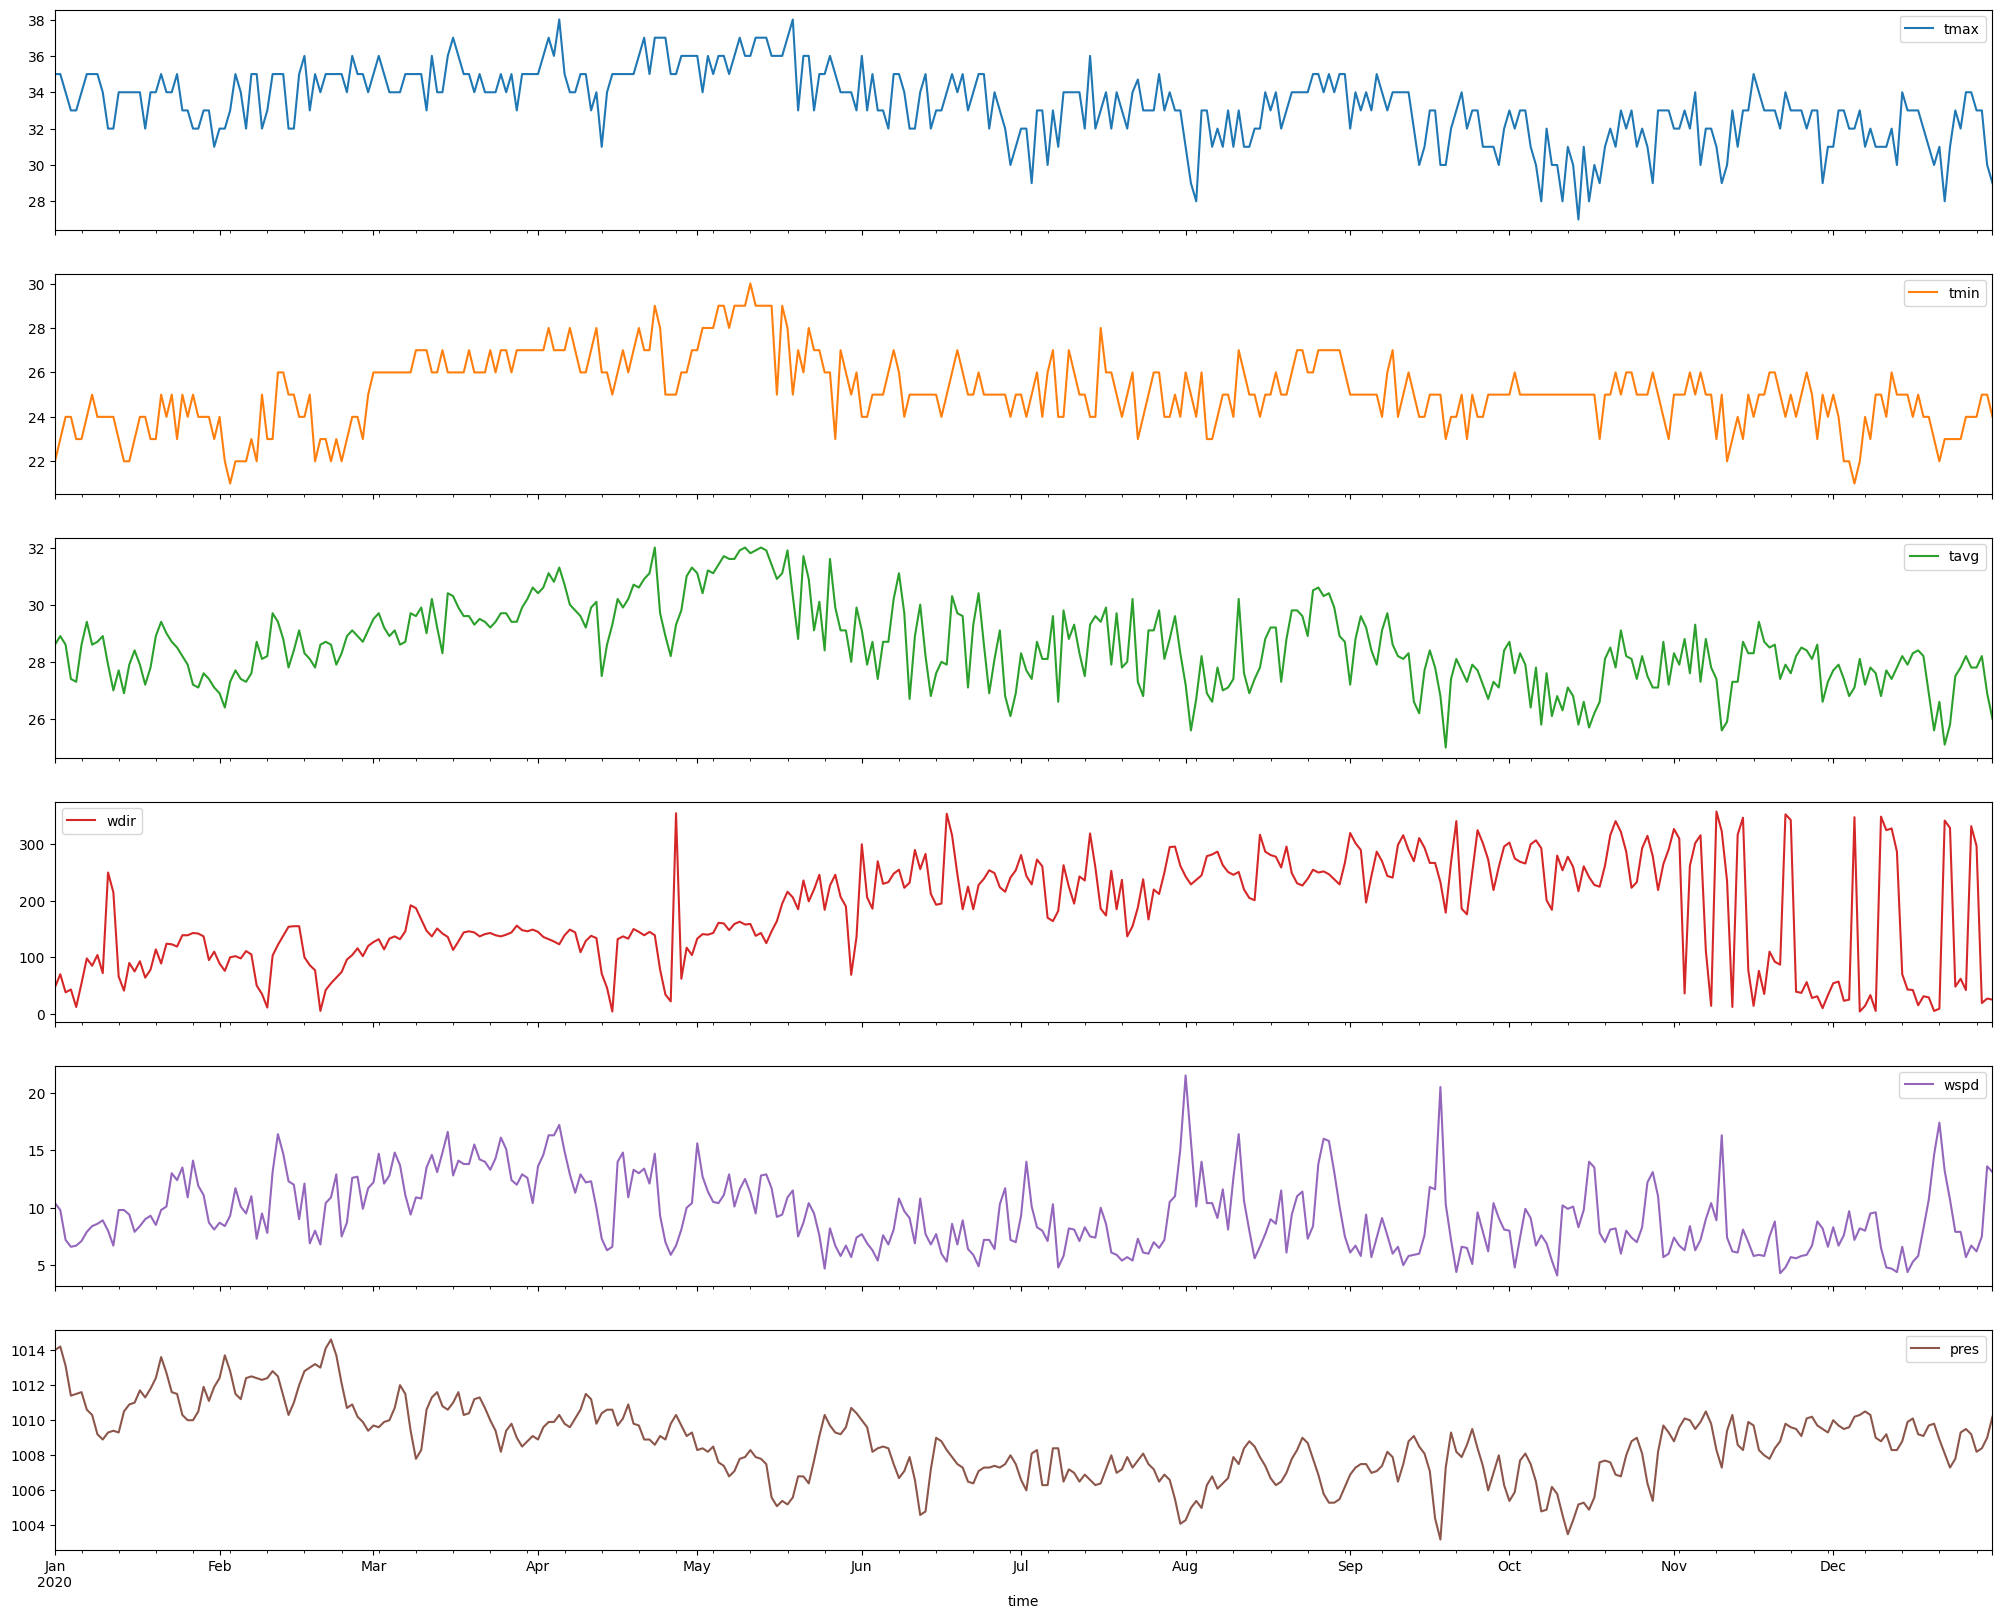

In [63]:
weather_data.plot(subplots=True, figsize=(25,20))

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

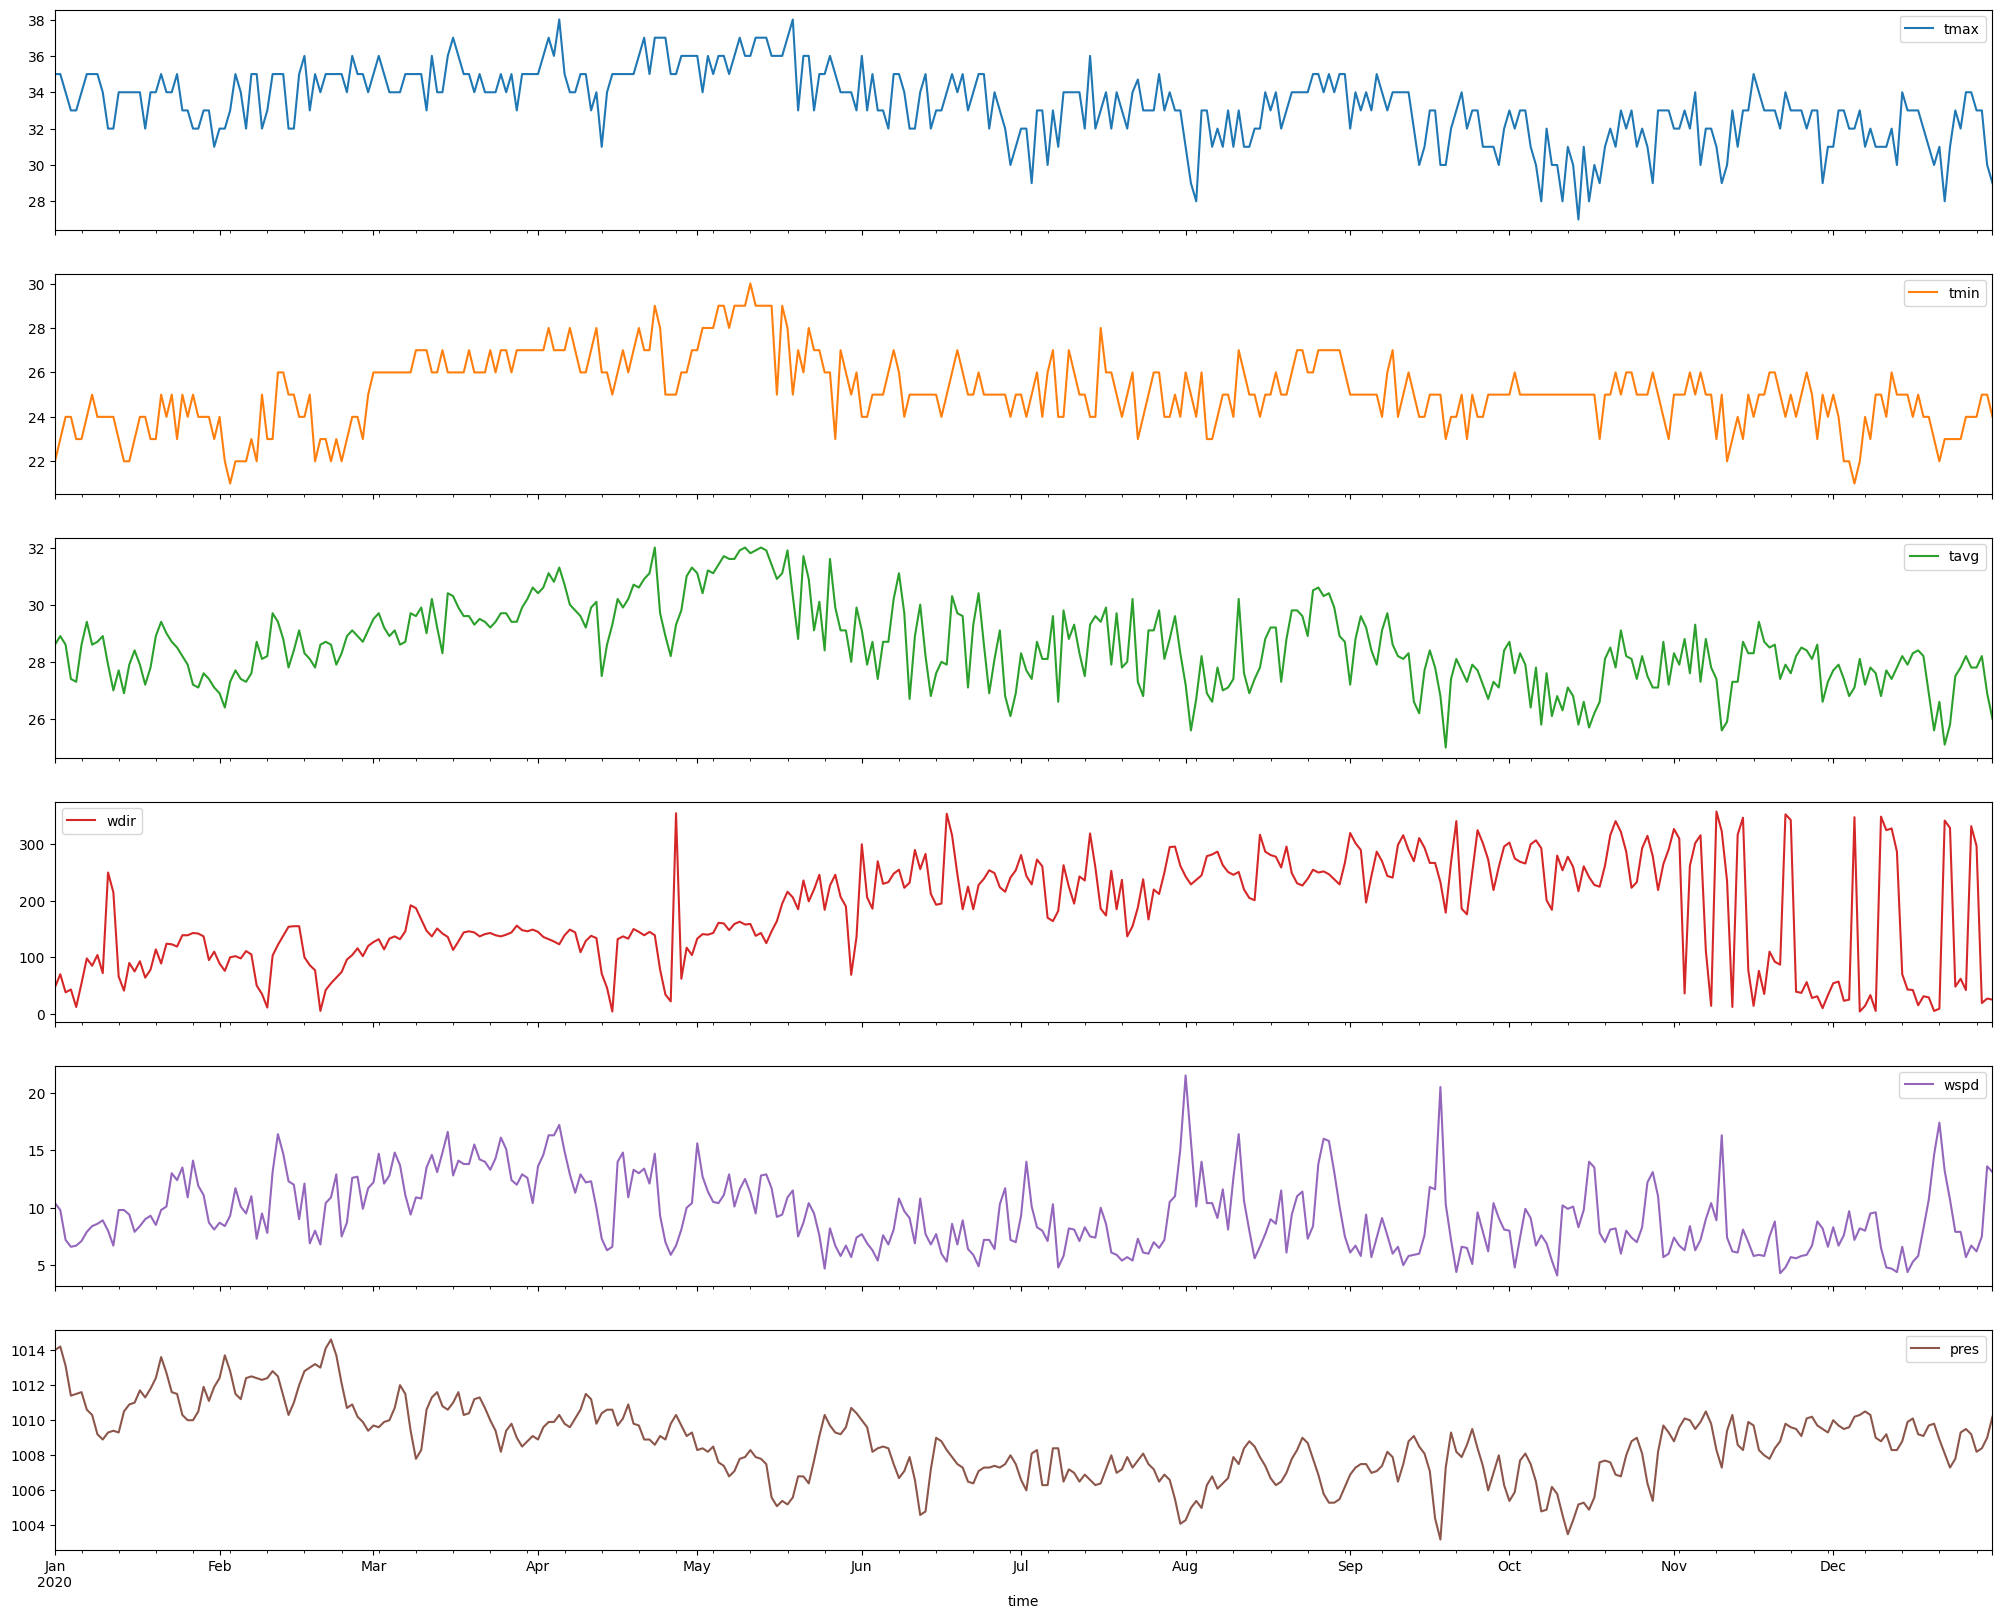

In [64]:
weather_data['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))
     

array([[<Axes: title={'center': 'tmax'}>,
        <Axes: title={'center': 'tmin'}>],
       [<Axes: title={'center': 'tavg'}>,
        <Axes: title={'center': 'wdir'}>],
       [<Axes: title={'center': 'wspd'}>,
        <Axes: title={'center': 'pres'}>]], dtype=object)

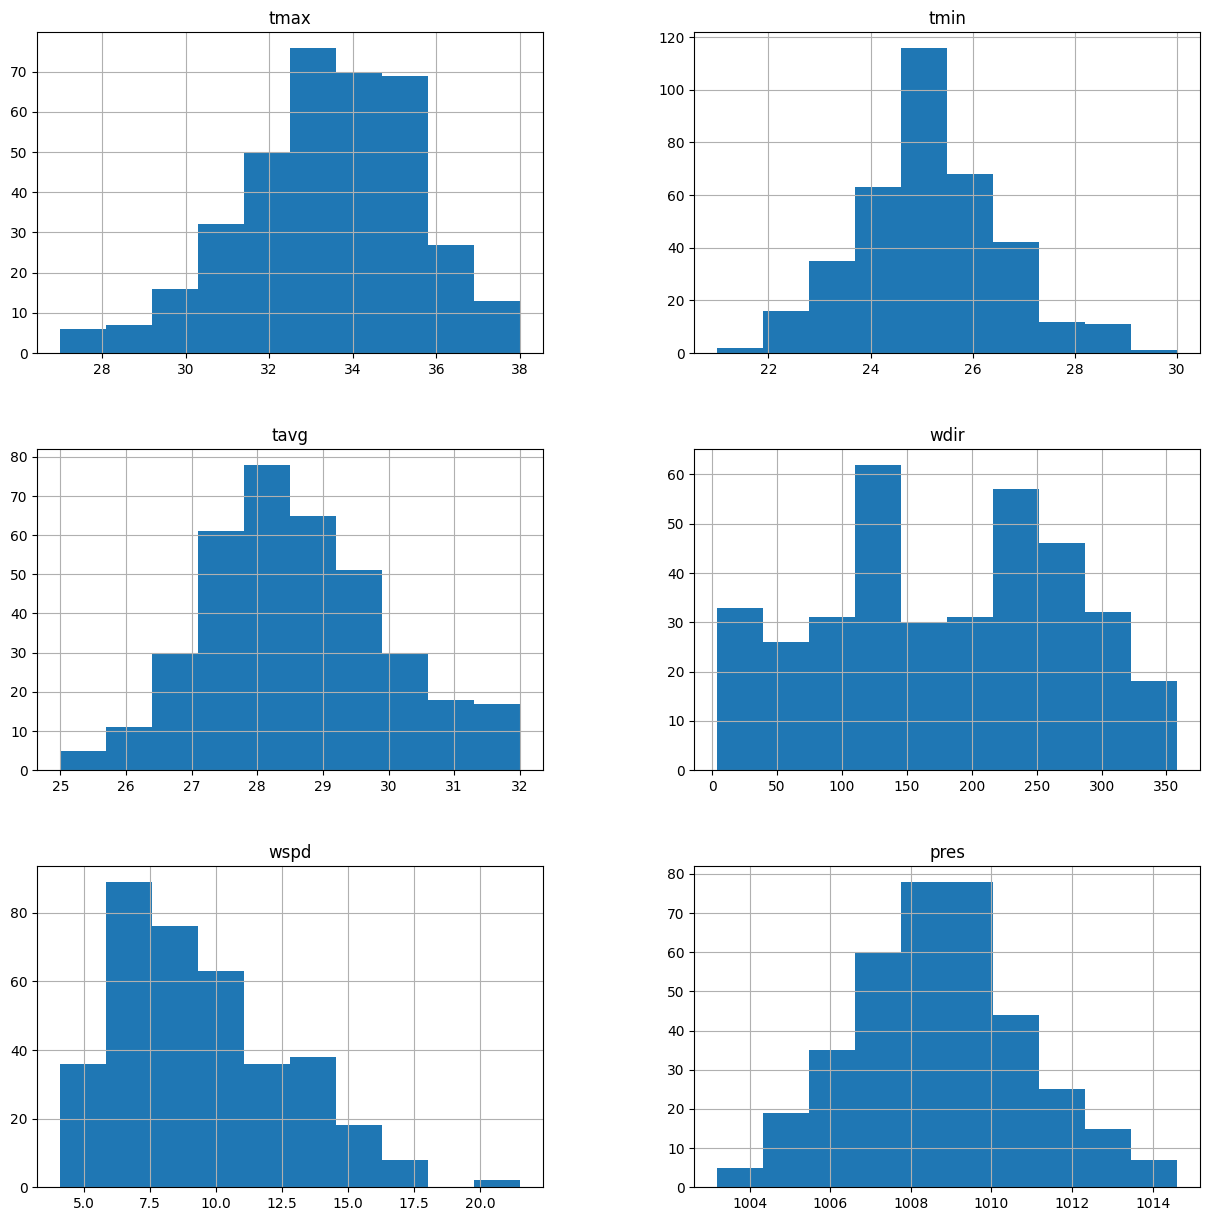

In [65]:
weather_data.hist(bins=10, figsize=(15,15))

In [66]:
weth = weather_data['2019':'2020']
weth.head()

,tmax,tmin,tavg,wdir,wspd,pres
time,,,,,,
2020-01-01,35.0,22,28.6,47,10.4,1014.0
2020-01-02,35.0,23,28.9,70,9.8,1014.2
2020-01-03,34.0,24,28.6,38,7.2,1013.1
2020-01-04,33.0,24,27.4,43,6.6,1011.4
2020-01-05,33.0,23,27.3,12,6.7,1011.5


In [67]:
train_y = weather_data.pop("tavg")
train_x = weather_data 

In [105]:
train_X, test_X, train_Y, test_Y = train_test_split(train_x, train_y, test_size=0.2, random_state=4)

In [106]:
train_X.shape

(292, 5)

In [110]:
train_Y.shape

(292,)

In [133]:
train_Y.head(10)

time
2020-03-23    29.2
2020-09-23    27.3
2020-02-15    28.4
2020-08-17    29.2
2020-07-12    28.3
2020-08-15    27.8
2020-02-03    27.3
2020-08-07    27.8
2020-04-22    31.1
2020-09-15    27.7
Name: tavg, dtype: float64

Multiple Linear Regression

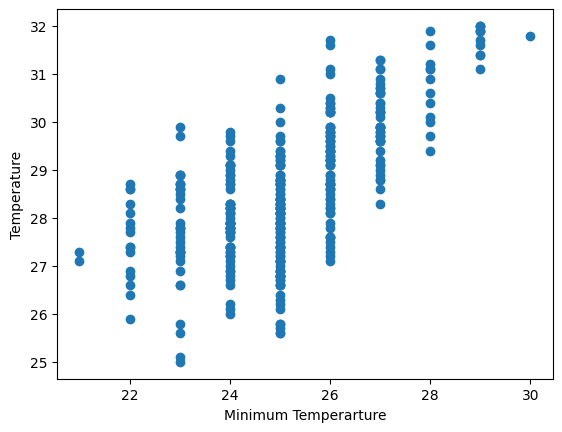

In [134]:
plt.scatter(weth.tmin, weth.tavg)
plt.xlabel('Minimum Temperarture')
plt.ylabel('Temperature')
plt.show()

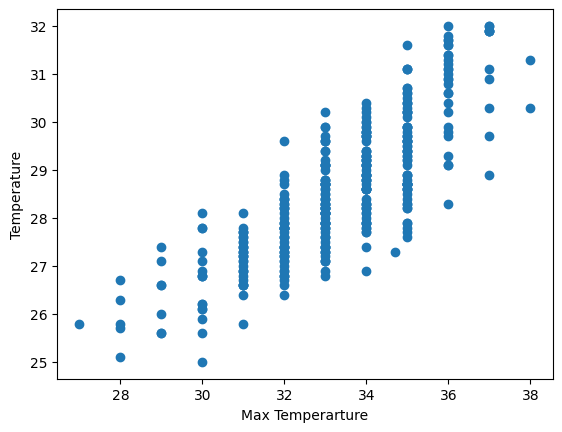

In [135]:
plt.scatter(weth.tmax, weth.tavg)
plt.xlabel('Max Temperarture')
plt.ylabel('Temperature')
plt.show()

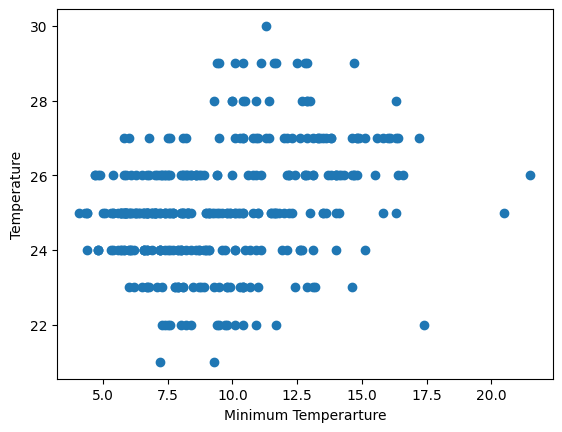

In [114]:
plt.scatter(weth.wspd, weth.tmin)
plt.xlabel('Minimum Temperarture')
plt.ylabel('Temperature')
plt.show()

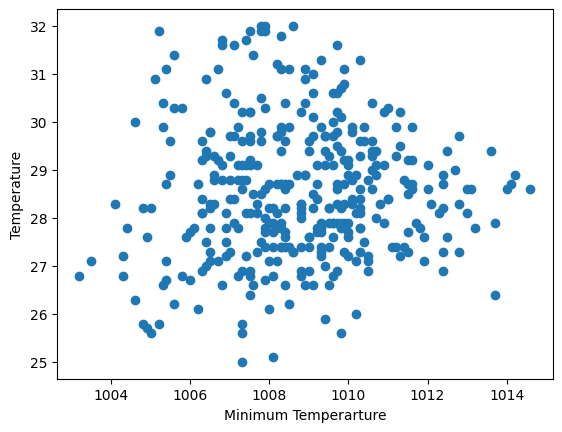

In [115]:
plt.scatter(weth.pres, weth.tavg)
plt.xlabel('Minimum Temperarture')
plt.ylabel('Temperature')
plt.show()

In [116]:
model = LinearRegression()
model.fit(train_X, train_Y)

LinearRegression()

In [117]:
prediction = model.predict(test_X)

In [118]:
np.mean(np.absolute(prediction-test_Y))

0.47966049927783044

In [119]:
print('Variance score: %.2f' % model.score(test_X, test_Y))

Variance score: 0.84


In [120]:
for i in  range(len(prediction)):
    prediction[i]= round(prediction[i], 2)
pd.DataFrame({'Actual': test_Y, 'Predicton': prediction, 'diff':(test_Y-prediction)})

,Actual,Predicton,diff
time,,,
2020-12-01,27.7,27.40,0.30
2020-05-19,30.3,30.90,-0.60
2020-02-12,29.4,29.78,-0.38
2020-01-15,27.9,27.82,0.08
2020-08-16,28.8,28.86,-0.06
...,...,...,...
2020-09-01,27.2,27.88,-0.68
2020-08-20,28.8,28.36,0.44
2020-11-01,28.3,27.87,0.43


Decision Tree Regression

In [121]:

from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_Y)

DecisionTreeRegressor(random_state=0)

In [122]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_Y))

0.7121621621621621

In [123]:
print('Variance score: %.2f' % regressor.score(test_X, test_Y))

Variance score: 0.65


In [124]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_Y,'Prediction':prediction2,'diff':(test_Y-prediction2)})

,Actual,Prediction,diff
time,,,
2020-12-01,27.7,27.2,0.5
2020-05-19,30.3,29.3,1.0
2020-02-12,29.4,29.2,0.2
2020-01-15,27.9,28.7,-0.8
2020-08-16,28.8,27.9,0.9
...,...,...,...
2020-09-01,27.2,27.5,-0.3
2020-08-20,28.8,29.6,-0.8
2020-11-01,28.3,27.8,0.5


Random Forest Regression


In [125]:

from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_Y)

RandomForestRegressor(max_depth=90, random_state=0)

In [126]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_Y))
     

0.50389189189189

In [127]:

print('Variance score: %.2f' % regr.score(test_X, test_Y))

Variance score: 0.82


In [128]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_Y,'Prediction':prediction3,'diff':(test_Y-prediction3)})
     

,Actual,Prediction,diff
time,,,
2020-12-01,27.7,27.39,0.31
2020-05-19,30.3,30.19,0.11
2020-02-12,29.4,29.70,-0.30
2020-01-15,27.9,28.07,-0.17
2020-08-16,28.8,28.45,0.35
...,...,...,...
2020-09-01,27.2,27.99,-0.79
2020-08-20,28.8,29.14,-0.34
2020-11-01,28.3,28.03,0.27


In [129]:
from sklearn.metrics import r2_score

Calculating R2-score for Multiple Linear Regression

In [130]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_Y,prediction ) )
     

Mean absolute error: 0.48
Residual sum of squares (MSE): 0.36
R2-score: 0.84


Calculating R2-score for Decision Tree Regression

In [131]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_Y,prediction2 ) )

Mean absolute error: 0.71
Residual sum of squares (MSE): 0.77
R2-score: 0.65


Calculating R2-score for Random Forest Regression

In [132]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_Y,prediction3 ) )

Mean absolute error: 0.50
Residual sum of squares (MSE): 0.77
R2-score: 0.82
